In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
# Load your cleaned data
df = pd.read_csv('../processed_data/merged_data_2017-2021.csv')

# Basic exploration
print(f"Dataset shape: {df.shape}")
print(f"Counties: {df['county'].nunique()}")
print(f"Years: {df['year'].unique()}")
print(df.describe())

Dataset shape: (265, 20)
Counties: 53
Years: [2017 2018 2019 2020 2021]
       Unnamed: 0         year  days_with_aqi   good_days  moderate_days  \
count  265.000000   265.000000     265.000000  265.000000     265.000000   
mean   132.000000  2019.000000     359.686792  182.154717     146.822642   
std     76.643112     1.416889      25.178078   85.829126      66.012931   
min      0.000000  2017.000000     140.000000    7.000000       0.000000   
25%     66.000000  2018.000000     365.000000  111.000000      93.000000   
50%    132.000000  2019.000000     365.000000  193.000000     147.000000   
75%    198.000000  2020.000000     365.000000  251.000000     197.000000   
max    264.000000  2021.000000     366.000000  360.000000     302.000000   

       unhealthy_for_sensitive_groups_days  unhealthy_days  \
count                           265.000000      265.000000   
mean                             20.649057        7.992453   
std                              26.392317       11.35848

In [4]:
df.rename(columns={'age-adjusted_rate_per_10,000': 'asthma_rate'}, inplace=True)

In [22]:
print(df)

     Unnamed: 0     county  year  days_with_aqi  good_days  moderate_days  \
0             0    Alameda  2017            365        106            245   
1             1     Amador  2017            362        291             67   
2             2      Butte  2017            365        100            241   
3             3  Calaveras  2017            354        118            222   
4             4     Colusa  2017            365        237            120   
..          ...        ...   ...            ...        ...            ...   
260         260    Trinity  2021            328        201             81   
261         261     Tulare  2021            365         49            182   
262         262   Tuolumne  2021            360        295             63   
263         263    Ventura  2021            365        157            198   
264         264       Yolo  2021            365        242            117   

     unhealthy_for_sensitive_groups_days  unhealthy_days  very_unhealthy_da

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'county', 'year', 'days_with_aqi', 'good_days',
       'moderate_days', 'unhealthy_for_sensitive_groups_days',
       'unhealthy_days', 'very_unhealthy_days', 'hazardous_days', 'max_aqi',
       '90th_percentile_aqi', 'median_aqi', 'days_co', 'days_no2',
       'days_ozone', 'days_pm2.5', 'days_pm10', 'asthma_rate',
       'number_of_cases'],
      dtype='object')


In [7]:
# 1. Which counties have the worst air quality?
worst_aqi = df.groupby('county')['median_aqi'].mean().sort_values(ascending=False).head(10)
print("Counties with highest median AQI:")
print(worst_aqi)

# 2. Which counties have highest asthma rates?
high_asthma = df.groupby('county')['asthma_rate'].mean().sort_values(ascending=False).head(10)

# 3. What's the correlation?
correlation = df['median_aqi'].corr(df['asthma_rate'])
print(f"Correlation between AQI and Asthma rates: {correlation:.3f}")

# 4. Statistical significance
slope, intercept, r_value, p_value, std_err = stats.linregress(df['median_aqi'], df['asthma_rate'])
print(f"R-squared: {r_value**2:.3f}, P-value: {p_value:.3f}")

Counties with highest median AQI:
county
San Bernardino    86.8
Riverside         85.4
Kern              81.0
Los Angeles       78.6
Tulare            77.6
Fresno            71.4
San Diego         68.4
Kings             66.8
Imperial          61.8
Madera            58.8
Name: median_aqi, dtype: float64
Correlation between AQI and Asthma rates: 0.026
R-squared: 0.001, P-value: 0.671


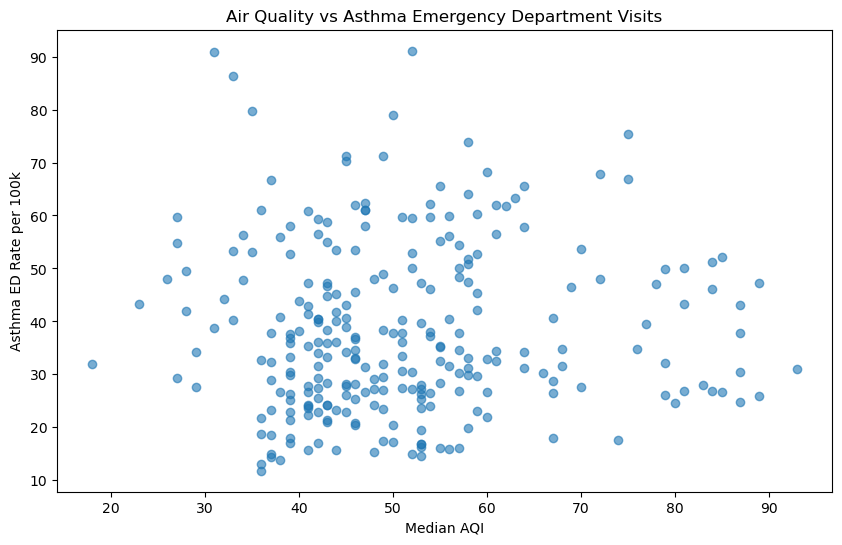

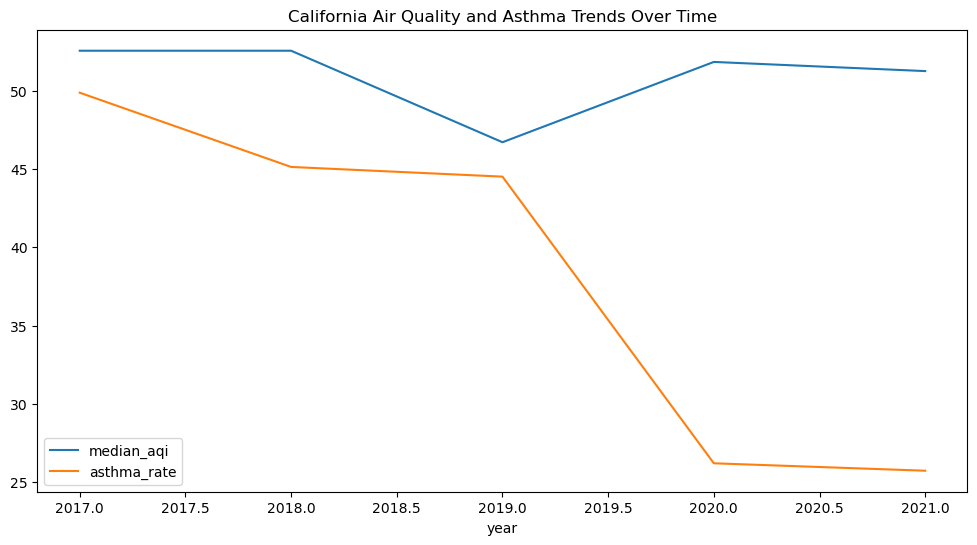

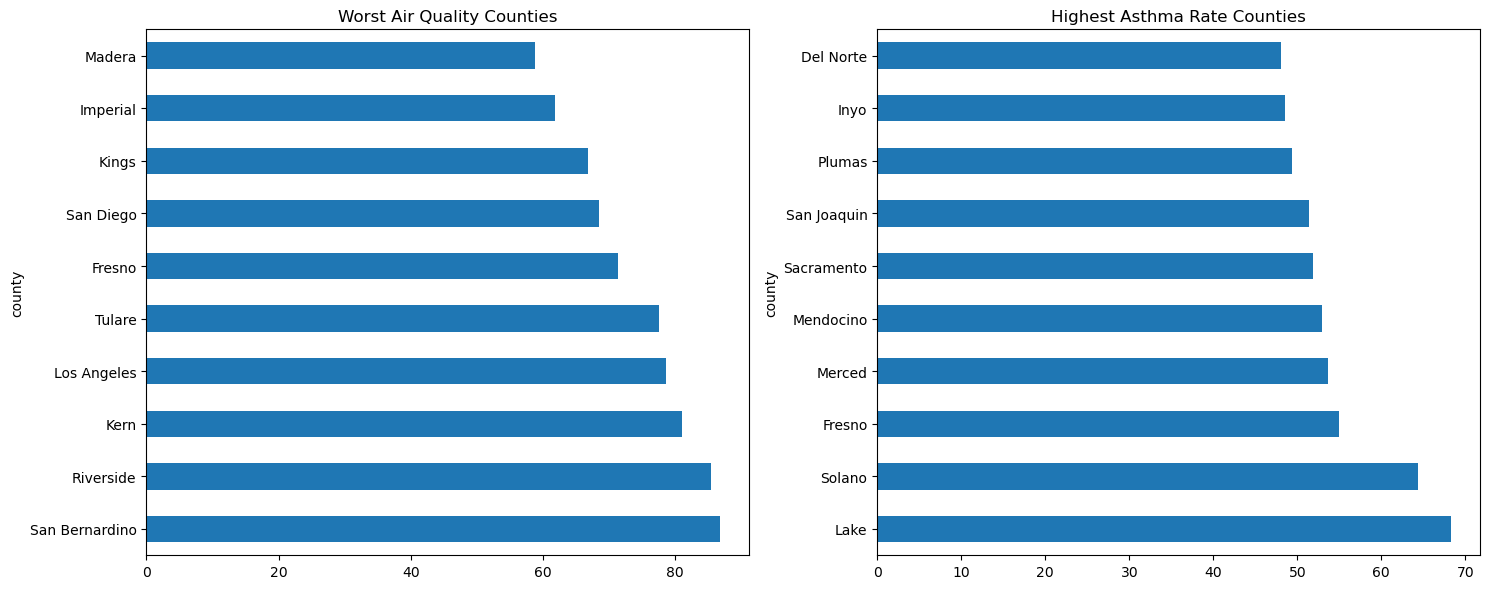

In [8]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['median_aqi'], df['asthma_rate'], alpha=0.6)
plt.xlabel('Median AQI')
plt.ylabel('Asthma ED Rate per 100k')
plt.title('Air Quality vs Asthma Emergency Department Visits')
plt.show()

# Time trends
yearly_trends = df.groupby('year')[['median_aqi', 'asthma_rate']].mean()
yearly_trends.plot(kind='line', figsize=(12, 6))
plt.title('California Air Quality and Asthma Trends Over Time')
plt.show()

# Top/bottom counties
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
worst_aqi.head(10).plot(kind='barh', ax=ax1, title='Worst Air Quality Counties')
high_asthma.head(10).plot(kind='barh', ax=ax2, title='Highest Asthma Rate Counties')
plt.tight_layout()
plt.show()